In [34]:
import numpy as np        
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore', category = UserWarning)

%matplotlib inline

pd.set_option('display.max_rows', 15)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

df = pd.read_csv('C:/Users/Pramoda A S/Desktop/AIML Documents/DataSets in CSV files/Phone_data.csv', parse_dates = True)

#creating a copy for modelling later
data = df.copy()

df


,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD $)
0,Y6II Compact,Huawei,Android 5.1,5.00,720x1280,2200,Li-Po,2,01-09-2016,140,...,False,False,False,True,False,False,False,False,False,120.000
1,K20 plus,LG,Android 7.0,5.30,720x1280,2700,Li-Ion,2,01-12-2016,140,...,True,False,False,True,False,False,False,False,False,100.000
2,P8 Lite (2017),Huawei,Android 7.0,5.20,1080x1920,3000,Li-Ion,4,01-01-2017,147,...,True,False,False,True,False,False,False,False,False,420.000
3,Redmi Note 4,Xiaomi,Android 6.0,5.50,1080x1920,4100,Li-Po,4,01-01-2017,165,...,True,False,False,True,False,True,False,False,False,150.000
4,P10,Huawei,Android 7.0,5.10,1080x1920,3200,Li-Ion,4,01-02-2017,145,...,True,True,False,True,True,False,False,False,False,420.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,vivo Y77t,Vivo,Android 13,6.64,1080x2388,5000,Li-Po,8,18-08-2023,190,...,True,False,False,True,False,False,False,False,False,170.000
1508,11x,Realme,Android 13,6.72,1080x2400,5000,Li-Po,8,23-08-2023,190,...,True,False,False,True,False,False,False,False,False,182.880
1509,GT5,Realme,Android 13,6.74,1240x2772,5240,Li-Po,16,28-08-2023,205,...,True,True,False,False,True,False,False,False,False,380.000
1510,GT5 240W,Realme,Android 13,6.74,1240x2772,4600,Li-Po,24,28-08-2023,205,...,True,True,False,False,True,False,False,False,False,470.000


# Show the first 5 rows.

In [35]:
df.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD $)
0,Y6II Compact,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,2,01-09-2016,140,...,False,False,False,True,False,False,False,False,False,120.0
1,K20 plus,LG,Android 7.0,5.3,720x1280,2700,Li-Ion,2,01-12-2016,140,...,True,False,False,True,False,False,False,False,False,100.0
2,P8 Lite (2017),Huawei,Android 7.0,5.2,1080x1920,3000,Li-Ion,4,01-01-2017,147,...,True,False,False,True,False,False,False,False,False,420.0
3,Redmi Note 4,Xiaomi,Android 6.0,5.5,1080x1920,4100,Li-Po,4,01-01-2017,165,...,True,False,False,True,False,True,False,False,False,150.0
4,P10,Huawei,Android 7.0,5.1,1080x1920,3200,Li-Ion,4,01-02-2017,145,...,True,True,False,True,True,False,False,False,False,420.0


# Show the last 5 rows.

In [36]:
df.tail()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD $)
1507,vivo Y77t,Vivo,Android 13,6.64,1080x2388,5000,Li-Po,8,18-08-2023,190,...,True,False,False,True,False,False,False,False,False,170.000
1508,11x,Realme,Android 13,6.72,1080x2400,5000,Li-Po,8,23-08-2023,190,...,True,False,False,True,False,False,False,False,False,182.880
1509,GT5,Realme,Android 13,6.74,1240x2772,5240,Li-Po,16,28-08-2023,205,...,True,True,False,False,True,False,False,False,False,380.000
1510,GT5 240W,Realme,Android 13,6.74,1240x2772,4600,Li-Po,24,28-08-2023,205,...,True,True,False,False,True,False,False,False,False,470.000
1511,vivo iQOO Z7 Pro,Vivo,Android 13,6.78,1080x2400,4600,Li-Po,8,31-08-2023,175,...,True,True,False,True,False,False,False,False,False,287.988


# Transformation & Cleaning

# show the inforamation of Dataframe.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   phone_name         1512 non-null   object 
 1   brand              1512 non-null   object 
 2   os                 1512 non-null   object 
 3   inches             1509 non-null   float64
 4   resolution         1512 non-null   object 
 5   battery            1512 non-null   int64  
 6   battery_type       1512 non-null   object 
 7   ram(GB)            1512 non-null   int64  
 8   announcement_date  1512 non-null   object 
 9   weight(g)          1512 non-null   int64  
 10  storage(GB)        1510 non-null   float64
 11  video_720p         1512 non-null   bool   
 12  video_1080p        1512 non-null   bool   
 13  video_4K           1512 non-null   bool   
 14  video_8K           1512 non-null   bool   
 15  video_30fps        1512 non-null   bool   
 16  video_60fps        1512 

# Show the size of Dataframe.

In [38]:
df.shape

(1512, 22)

# Show the Null values in DataFrame.

In [39]:
df.isnull().sum()

phone_name      0
brand           0
os              0
inches          3
resolution      0
               ..
video_120fps    0
video_240fps    0
video_480fps    0
video_960fps    0
price(USD $)    0
Length: 22, dtype: int64

# Fill the null values using mean.

In [40]:
a=df['inches'].mean()
print("Inches column Average value is :",a)

Inches column Average value is : 6.424625579854252


In [41]:
df['inches']=df['inches'].fillna(a)
df

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD $)
0,Y6II Compact,Huawei,Android 5.1,5.00,720x1280,2200,Li-Po,2,01-09-2016,140,...,False,False,False,True,False,False,False,False,False,120.000
1,K20 plus,LG,Android 7.0,5.30,720x1280,2700,Li-Ion,2,01-12-2016,140,...,True,False,False,True,False,False,False,False,False,100.000
2,P8 Lite (2017),Huawei,Android 7.0,5.20,1080x1920,3000,Li-Ion,4,01-01-2017,147,...,True,False,False,True,False,False,False,False,False,420.000
3,Redmi Note 4,Xiaomi,Android 6.0,5.50,1080x1920,4100,Li-Po,4,01-01-2017,165,...,True,False,False,True,False,True,False,False,False,150.000
4,P10,Huawei,Android 7.0,5.10,1080x1920,3200,Li-Ion,4,01-02-2017,145,...,True,True,False,True,True,False,False,False,False,420.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,vivo Y77t,Vivo,Android 13,6.64,1080x2388,5000,Li-Po,8,18-08-2023,190,...,True,False,False,True,False,False,False,False,False,170.000
1508,11x,Realme,Android 13,6.72,1080x2400,5000,Li-Po,8,23-08-2023,190,...,True,False,False,True,False,False,False,False,False,182.880
1509,GT5,Realme,Android 13,6.74,1240x2772,5240,Li-Po,16,28-08-2023,205,...,True,True,False,False,True,False,False,False,False,380.000
1510,GT5 240W,Realme,Android 13,6.74,1240x2772,4600,Li-Po,24,28-08-2023,205,...,True,True,False,False,True,False,False,False,False,470.000


In [42]:
df.isnull().sum()

phone_name      0
brand           0
os              0
inches          0
resolution      0
               ..
video_120fps    0
video_240fps    0
video_480fps    0
video_960fps    0
price(USD $)    0
Length: 22, dtype: int64

In [43]:
df.duplicated().sum()

0

In [44]:
df.phone_name.value_counts(ascending = True)

9A                  1
Pixel 4 XL          1
Black Shark Helo    1
Y6 (2019)           1
vivo Y02t           1
                   ..
9 Pro               2
X7                  2
10                  2
10 Pro              2
V30                 3
Name: phone_name, Length: 1496, dtype: int64

In [46]:
df.drop("video_120fps",axis=1,inplace=True)

In [47]:
df.drop(["video_240fps","video_480fps","video_960fps"],axis=1,inplace=True)

In [71]:
df

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),storage(GB),video_720p,video_1080p,video_4K,video_8K,video_30fps,video_60fps,price(USD $)
0,Y6II Compact,Huawei,Android 5.1,5.00,720x1280,2200,Li-Po,2,01-09-2016,140,16.0,True,False,False,False,True,False,120.000
1,K20 plus,LG,Android 7.0,5.30,720x1280,2700,Li-Ion,2,01-12-2016,140,16.0,False,True,False,False,True,False,100.000
2,P8 Lite (2017),Huawei,Android 7.0,5.20,1080x1920,3000,Li-Ion,4,01-01-2017,147,16.0,False,True,False,False,True,False,420.000
3,Redmi Note 4,Xiaomi,Android 6.0,5.50,1080x1920,4100,Li-Po,4,01-01-2017,165,32.0,True,True,False,False,True,False,150.000
4,P10,Huawei,Android 7.0,5.10,1080x1920,3200,Li-Ion,4,01-02-2017,145,32.0,True,True,True,False,True,True,420.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,vivo Y77t,Vivo,Android 13,6.64,1080x2388,5000,Li-Po,8,18-08-2023,190,256.0,False,True,False,False,True,False,170.000
1508,11x,Realme,Android 13,6.72,1080x2400,5000,Li-Po,8,23-08-2023,190,128.0,False,True,False,False,True,False,182.880
1509,GT5,Realme,Android 13,6.74,1240x2772,5240,Li-Po,16,28-08-2023,205,256.0,True,True,True,False,False,True,380.000
1510,GT5 240W,Realme,Android 13,6.74,1240x2772,4600,Li-Po,24,28-08-2023,205,1.0,True,True,True,False,False,True,470.000


In [73]:
df.describe()

,inches,battery,ram(GB),weight(g),storage(GB),price(USD $)
count,1512.000000,1512.000000,1512.000000,1512.000000,1510.000000,1512.000000
mean,6.424626,4389.798942,6.683862,187.636243,109.277483,337.847036
std,0.474098,784.607022,2.701433,26.200115,74.420584,266.740821
min,3.800000,1821.000000,1.000000,130.000000,1.000000,40.000000
25%,6.330000,4000.000000,4.000000,175.000000,64.000000,179.997500
50%,6.500000,4500.000000,8.000000,187.000000,128.000000,260.000000
75%,6.670000,5000.000000,8.000000,197.250000,128.000000,400.000000
max,10.400000,7250.000000,24.000000,500.000000,512.000000,2300.000000


In [77]:
# It shows unique values in Storage column.

df['storage(GB)'].unique()

array([ 16.,  32.,  64.,   8.,  nan, 256., 128., 512.,   1.])

In [78]:
# It shows the only Storage 1.0

df[df['storage(GB)'] == 1.0]

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),storage(GB),video_720p,video_1080p,video_4K,video_8K,video_30fps,video_60fps,price(USD $)
1510,GT5 240W,Realme,Android 13,6.74,1240x2772,4600,Li-Po,24,28-08-2023,205,1.0,True,True,True,False,False,True,470.0


In [79]:
numerical = df.select_dtypes(['number'])
numerical.head()

,inches,battery,ram(GB),weight(g),storage(GB),price(USD $)
0,5.0,2200,2,140,16.0,120.0
1,5.3,2700,2,140,16.0,100.0
2,5.2,3000,4,147,16.0,420.0
3,5.5,4100,4,165,32.0,150.0
4,5.1,3200,4,145,32.0,420.0


In [80]:
df

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),storage(GB),video_720p,video_1080p,video_4K,video_8K,video_30fps,video_60fps,price(USD $)
0,Y6II Compact,Huawei,Android 5.1,5.00,720x1280,2200,Li-Po,2,01-09-2016,140,16.0,True,False,False,False,True,False,120.000
1,K20 plus,LG,Android 7.0,5.30,720x1280,2700,Li-Ion,2,01-12-2016,140,16.0,False,True,False,False,True,False,100.000
2,P8 Lite (2017),Huawei,Android 7.0,5.20,1080x1920,3000,Li-Ion,4,01-01-2017,147,16.0,False,True,False,False,True,False,420.000
3,Redmi Note 4,Xiaomi,Android 6.0,5.50,1080x1920,4100,Li-Po,4,01-01-2017,165,32.0,True,True,False,False,True,False,150.000
4,P10,Huawei,Android 7.0,5.10,1080x1920,3200,Li-Ion,4,01-02-2017,145,32.0,True,True,True,False,True,True,420.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,vivo Y77t,Vivo,Android 13,6.64,1080x2388,5000,Li-Po,8,18-08-2023,190,256.0,False,True,False,False,True,False,170.000
1508,11x,Realme,Android 13,6.72,1080x2400,5000,Li-Po,8,23-08-2023,190,128.0,False,True,False,False,True,False,182.880
1509,GT5,Realme,Android 13,6.74,1240x2772,5240,Li-Po,16,28-08-2023,205,256.0,True,True,True,False,False,True,380.000
1510,GT5 240W,Realme,Android 13,6.74,1240x2772,4600,Li-Po,24,28-08-2023,205,1.0,True,True,True,False,False,True,470.000


In [81]:
 df.max()

phone_name      vivo iQOO Z7x
brand                  Xiaomi
os                     iOS 16
inches                   10.4
resolution           900x1600
                    ...      
video_4K                 True
video_8K                 True
video_30fps              True
video_60fps              True
price(USD $)             2300
Length: 18, dtype: object

					  Grid of Boxplots for Numerical Columns 


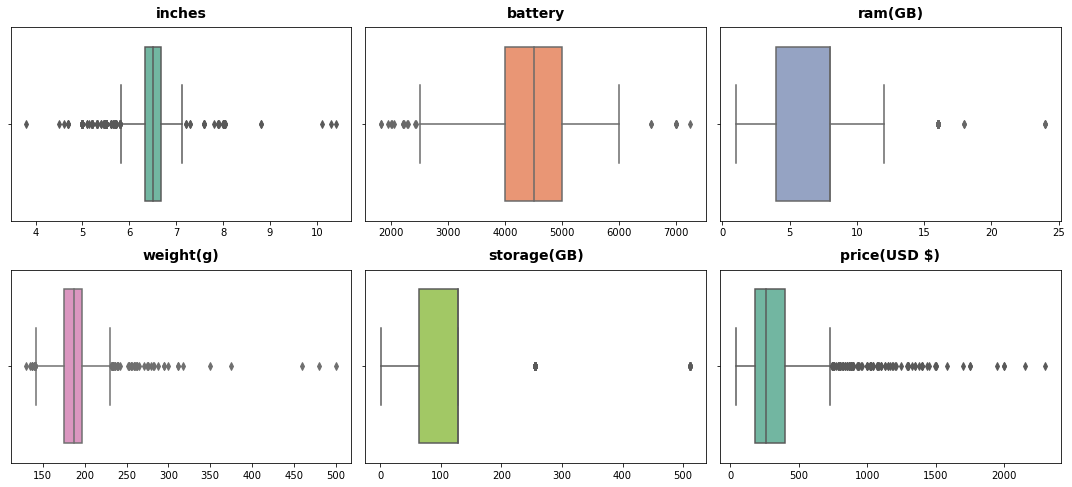

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

print('\t\t\t\t\t  Grid of Boxplots for Numerical Columns ')

fig, axes = plt.subplots(3, 3, figsize = (15, 10))
colors = sns.color_palette("Set2", n_colors=5)
axes = axes.flatten()

for i, col in enumerate(numerical.columns):
    sns.boxplot(x=numerical[col], ax=axes[i], color = colors[i % len(colors)])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('')  #for spacing

for i in range(len(numerical.columns), 9):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

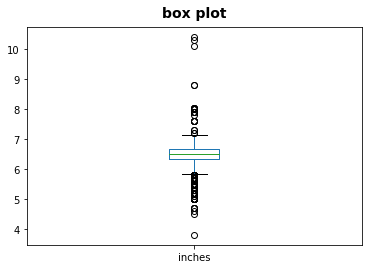

In [83]:
df['inches'].plot(kind='box')
plt.title('box plot')
plt.show()

In [93]:
#Removing all outliers

outliers = df[(df['weight(g)'] > 450.0) | (df['price(USD $)'] > 2000.0) | (df['ram(GB)'] > 15.0)]

df.drop(outliers.index, inplace = True)

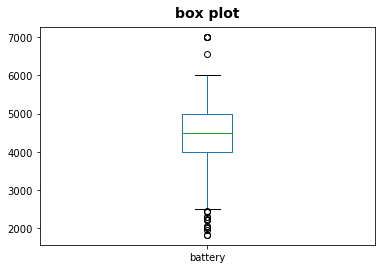

In [95]:
df['battery'].plot(kind='box')
plt.title('box plot')
plt.show()

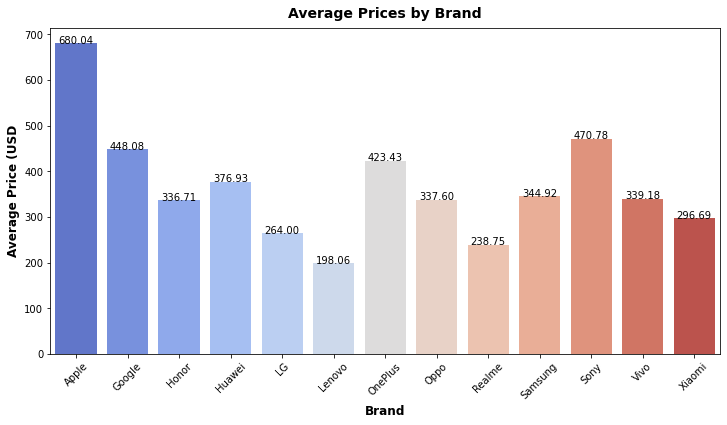

In [97]:
avg_prices = df.groupby('brand')['price(USD $)'].mean()

plt.figure(figsize=(12, 6))  

ax = sns.barplot(x=avg_prices.index, y=avg_prices.values, palette='coolwarm')
plt.xticks(rotation=45) 
plt.title('Average Prices by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price (USD')

# Add number ticks on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

# Number of Phones by Brand

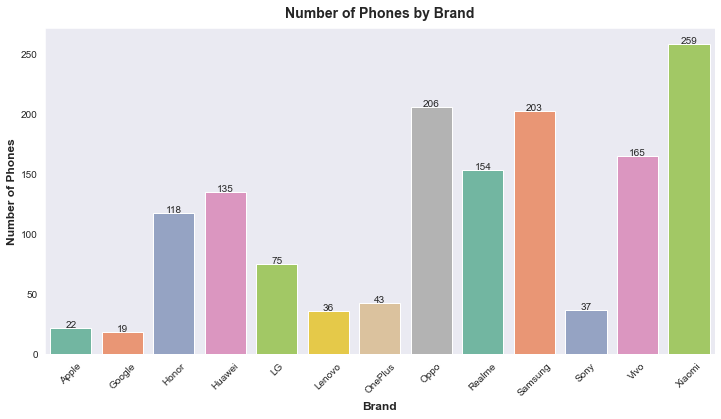

In [98]:
number_of_phones = df.groupby('brand').phone_name.count()

plt.figure(figsize=(12, 6))
sns.set_style('dark')
ax = sns.barplot(x=number_of_phones.index, y=number_of_phones.values, palette='Set2')
plt.xticks(rotation=45) 
plt.title('Number of Phones by Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Phones')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
    
plt.show()

# How are the battery types distributed?

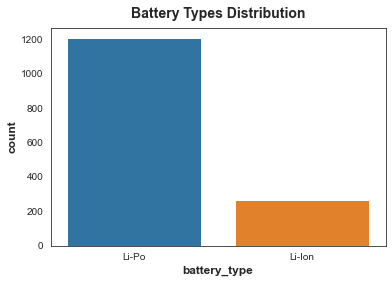

In [99]:
sns.set_style('white')
sns.countplot(data = df, x = 'battery_type')
plt.title('Battery Types Distribution')
plt.show()

In [101]:
# It shows the mean value using groupby.

brand_specs = df.groupby(['brand'])[['ram(GB)', 'weight(g)', 'storage(GB)', 'battery']].mean()
brand_specs

,ram(GB),weight(g),storage(GB),battery
brand,,,,
Apple,4.500000,186.227273,93.090909,3048.590909
Google,6.526316,181.263158,107.789474,3902.000000
Honor,6.957627,186.338983,131.796610,4307.457627
Huawei,5.911111,180.762963,102.281481,3931.629630
LG,3.933333,173.386667,60.693333,3586.933333
Lenovo,4.861111,185.611111,64.000000,4089.166667
OnePlus,7.534884,190.581395,133.953488,4499.883721
Oppo,6.990291,179.640777,121.209756,4368.203883
Realme,6.344156,188.538961,94.337662,4808.181818
